# <center>Variation of power plants capacity amoung fuel kind and time</center>
## <center>by Aiman Azzi</center>



## Investigation Overview

In this investigation, I wanted to see the variation of capacity_mw variable amoung other features: **primary_fuel** for categorisation, and **commissioning_year** for time growth.



## Dataset Overview

The data consisted of capacity greater than 1 **MW** and other features of nearly 35000 power plants across the world. The features included many features like: power generation, primary fuel used and years of operation. It had 324 unvalid rows, many outliers and unnecessary columns that were dropped for this analyses. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
plants = pd.read_csv('global_power_plant_database.csv')

In [3]:
#Some Wrangling:
# Changing data types for year columns
plants.loc[plants['commissioning_year'].notna(),'commissioning_year'] = plants.loc[plants['commissioning_year'].notna(),'commissioning_year'].astype(int)
plants.loc[plants['year_of_capacity_data'].notna(),'year_of_capacity_data'] = plants.loc[plants['year_of_capacity_data'].notna(),'year_of_capacity_data'].astype(int).astype(str)

In [4]:
#Droping rows with negative generation values

plants.drop(plants.loc[(plants['generation_gwh_2013'] < 0) | (plants['generation_gwh_2014'] < 0 ) |(plants['generation_gwh_2015'] < 0)
          |(plants['generation_gwh_2016'] < 0)|(plants['generation_gwh_2017'] < 0)|(plants['generation_gwh_2018'] < 0)
          |(plants['generation_gwh_2019'] < 0)].index, inplace= True)

In [5]:
#Only main features is being took
plants = plants.loc[:,['year_of_capacity_data','capacity_mw', 'generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019', 'primary_fuel', 'country_long', 'country', 'commissioning_year', 'other_fuel1', 'other_fuel2','other_fuel3']]

#Take off outliers
plants = plants.loc[plants['capacity_mw']<= 2000]

In [6]:
plants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34145 entries, 0 to 34935
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year_of_capacity_data  14439 non-null  object 
 1   capacity_mw            34145 non-null  float64
 2   generation_gwh_2013    6088 non-null   float64
 3   generation_gwh_2014    6875 non-null   float64
 4   generation_gwh_2015    7824 non-null   float64
 5   generation_gwh_2016    8728 non-null   float64
 6   generation_gwh_2017    9076 non-null   float64
 7   generation_gwh_2018    9237 non-null   float64
 8   generation_gwh_2019    9265 non-null   float64
 9   primary_fuel           34145 non-null  object 
 10  country_long           34145 non-null  object 
 11  country                34145 non-null  object 
 12  commissioning_year     16806 non-null  float64
 13  other_fuel1            1794 non-null   object 
 14  other_fuel2            265 non-null    object 
 15  ot

## Distribution of Capacity Values.

Using logarithmic scale, the distribution of capacity have a multimodal shape. The capacity in th dataset is taking a wide range of values, starting from $1 MW$ to $2000 MW$.


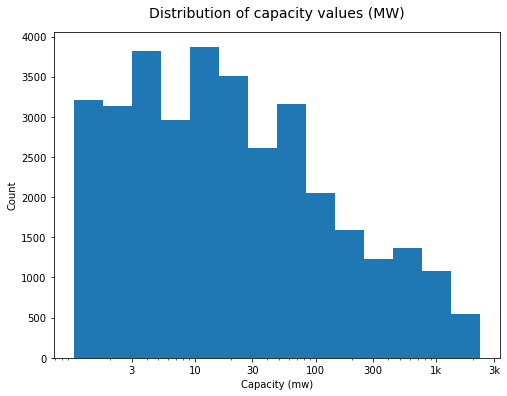

In [20]:
#Using the log scale

log_bin = 0.24
bins = 10 ** np.arange(0, np.log10(plants['capacity_mw'].max())+log_bin, log_bin)

plt.figure(figsize=[8,6])
plt.hist(data= plants, x = 'capacity_mw', bins = bins);
plt.xscale('log')
plt.xticks([3,10, 30, 100, 300, 1000,3000],[3,10, 30, 100, 300, '1k', '3k'] )
plt.xlabel('Capacity (mw)')
plt.ylabel('Count')
plt.title('Distribution of capacity values (MW)', y = 1.025, fontsize = 14);

## Distribution of Primary Fuel.

There are many fuel kinds in this data. The distribution of fuel categories shows the number of plants for each categorie. The Most used three fuels are renewable energies: **Solar**, **Hydro** and **Wind**.

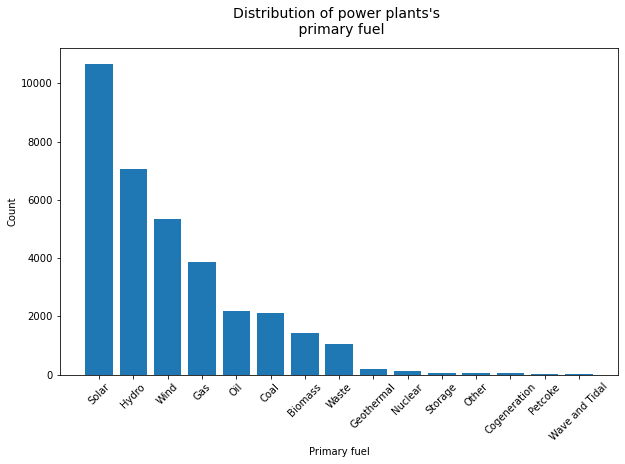

In [19]:
#making categories and bar height values for the plot
fuel = plants.groupby('primary_fuel').count()['country'].sort_values(ascending= False)
count_fuel = fuel.values
fuel_type = fuel.index
plt.bar(x = fuel_type, height =count_fuel )
plt.xticks(rotation = 45)
plt.xlabel('Primary fuel')
plt.ylabel('Count')
plt.title('Distribution of power plants\'s \n primary fuel', fontsize = 14, y = 1.025);

## Capacity amoung Years.

The growth of capacity amoung years is changing from period to another, on general there is an increasement until around 1940. Then close to 1980 it start rising again until it reaches it's highest value (More than $400 MW$) and begins to drop, it increases again from the 90's to after 2000's, but the last 20 years it is falling down.

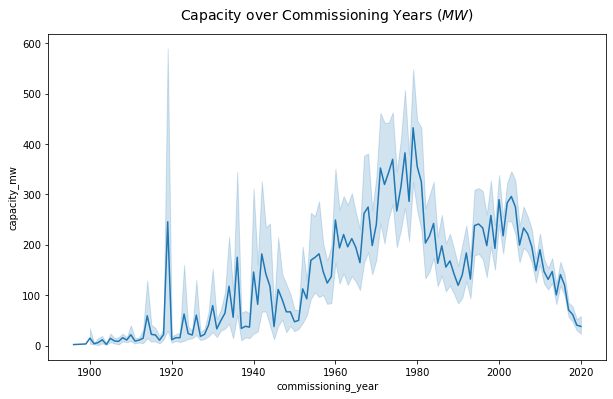

In [11]:
sb.lineplot(data= plants, x = 'commissioning_year', y = 'capacity_mw')
plt.title('Capacity over Commissioning Years $(MW)$', fontsize = 14, y= 1.025);
#plt.xticks([1900, 1920, 1940, 1960, 1980, 2000], [1900, 1920, 1940, 1960, 1980, 2000])

## Capacity vs. Primary Fuel


Whether the fuel type has a high or low frequency, in this dataset it's not always related to the capacity. Against to the distribution of primary fuel, Nuclear fuel has the highest capacity average, followed by Coal and Gas. While Solar and Wind have low capacity even their huge frequency in plants usage.  

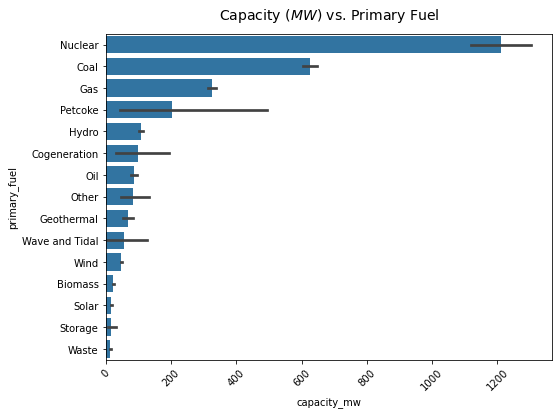

In [12]:
default_c = sb.color_palette()[0]
bar_order = plants.groupby('primary_fuel')['capacity_mw'].mean().sort_values(ascending = False).index
plt.rcParams['figure.figsize'] = [8, 6]
sb.barplot(data= plants, y = 'primary_fuel', x = 'capacity_mw', color= default_c, order= bar_order)
plt.title('Capacity $(MW)$ vs. Primary Fuel', fontsize = 14, y= 1.025)
plt.xticks(rotation = 45);

## Capacity vs. Years for each Fuel kind.

There is a big relativity in the growth of capacity for each kind of fuel. On general, Coal and Gas are having almost the same shape, except for Coal being increasing in somehow. More big changes exists on Oil and Hydro. Other kinds doesn't have any interesting look, it's just moslty stable with small value.

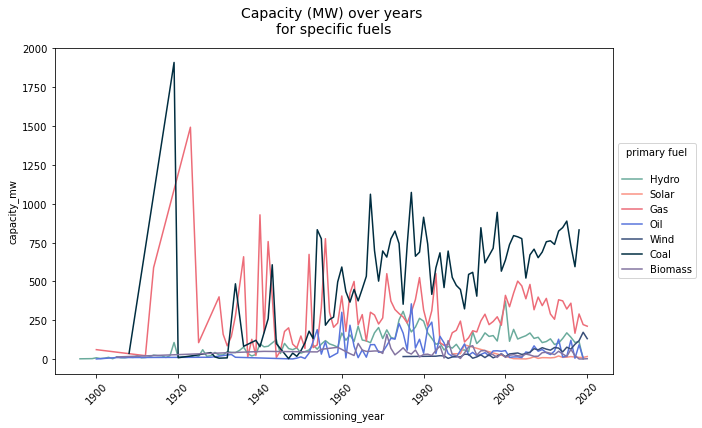

In [13]:
plt.figure(figsize = [10, 6])

sb.lineplot(data = plants[plants.primary_fuel.isin(['Solar', 'Hydro', 'Wind', 'Gas', 'Oil', 'Coal', 'Biomass'])], x = 'commissioning_year', y = 'capacity_mw', hue = 'primary_fuel', 
            err_style= None, palette= ['#6AAB9C', '#FA9284', '#ED6C78', '#5874DC', '#384E78', '#002D40', '#8474A1'])
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), title = 'primary fuel\n')
plt.xticks(rotation = 45);
plt.title('Capacity (MW) over years \nfor specific fuels', fontsize=14, y=1.025);

In [1]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

^C
